In [96]:
#Initial Imports 
import numpy as np 
import pandas as pd 
import datetime as dt 
from pathlib import Path
import panel as pn

pn.extension('plotly')

import plotly.express as px
import matplotlib.pyplot as plt

import holoviews as hv
from holoviews import opts
import hvplot.pandas

from panel.interact import interact
from panel import widgets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

# Reading and Cleaning Data

In [97]:
#Reading in files 
coffee_futures = Path('resources/coffee_c_futures.csv')
fx_allcountries = Path('resources/fx_5countries.csv')
irates_brazil = Path('resources/irates_brazil.csv')
irates_colombia = Path('resources/irates_colombia.csv')
irates_ethiopia = Path('resources/irates_ethiopia.csv')
irates_honduras = Path('resources/irates_honduras.csv')
irates_uganda = Path('resources/irates_uganda.csv')
total_prod_csv = Path('resources/TotalProduction.csv')
total_prod = pd.read_csv(total_prod_csv, index_col="Crop year",parse_dates=True).T
exports_csv = Path('resources/Exports.csv')
exports = pd.read_csv(exports_csv, index_col="Crop year").T
opening_stx_csv = Path('resources/OpeningStocks.csv')
opening_stx = pd.read_csv(opening_stx_csv, index_col="Crop years").T
prices_to_growers_csv = Path('resources/PricesToGrowers.csv')
prices_to_growers = pd.read_csv(prices_to_growers_csv, index_col="Calendar years").T
retail_prices_csv = Path('resources/RetailPrices.csv')
retail_prices = pd.read_csv(retail_prices_csv, index_col="Calendar years").T
country_locations = Path('resources/country_locations.csv')

#Country Locations
locations = pd.read_csv(country_locations)

#Coffee Futures
coffee_futures_data = pd.read_csv(coffee_futures, parse_dates=True, index_col='Date')

#FX 
fx_data = pd.read_csv(fx_allcountries, index_col='Country').T
fx_data = fx_data.iloc[3:]
fx_data = fx_data[['Colombia', 'Honduras', 'Uganda', 'Ethiopia', 'Brazil']]
fx_data.columns = ['Colombia New FX', 'Colombia Old FX', 'Colombia Real FX', 'Honduras New FX', 'Honduras Old FX', 
                   'Honduras Real FX', 'Uganda New FX', 'Uganda Old FX', 'Uganda Real FX', 'Ethiopia New FX', 'Ethiopia Old FX', 
                   'Ethiopia Real FX', 'Brazil New FX', 'Brazil Old FX', 'Brazil Real FX']
fx_data.index.name='Date'


#Brazil Rates
irates_brazil_data = pd.read_csv(irates_brazil, index_col=[0]).T
new_header_brazil = irates_brazil_data.iloc[0]
irates_brazil_data=irates_brazil_data[1:]
irates_brazil_data.columns=new_header_brazil

irates_brazil_data =irates_brazil_data[['Indicator', 'Central Bank Policy Rate', 'Discount Rate', 'Money Market Rate', 
                                        'Treasury Bill Rate', 'Savings Rate', 'Deposit Rate', 'Lending Rate']]
irates_brazil_data.reset_index
irates_brazil_data['Indicator'] = irates_brazil_data['Indicator'].astype(str)
irates_brazil_data.set_index('Indicator', inplace=True)

irates_brazil_data=irates_brazil_data.iloc[3:]

#Colombia Rates
irates_colombia_data = pd.read_csv(irates_colombia, index_col=[0]).T
new_header_colombia = irates_colombia_data.iloc[0]
irates_colombia_data=irates_colombia_data[1:]
irates_colombia_data.columns=new_header_colombia

irates_colombia_data =irates_colombia_data[['Indicator', 'Central Bank Policy Rate', 'Discount Rate', 
                                            'Money Market Rate', 'Deposit Rate', 'Lending Rate']]
irates_colombia_data.reset_index
irates_colombia_data['Indicator'] = irates_colombia_data['Indicator'].astype(str)
irates_colombia_data.set_index('Indicator', inplace=True)

irates_colombia_data=irates_colombia_data.iloc[3:]

#Ethiopia Rates
irates_ethiopia_data = pd.read_csv(irates_ethiopia, index_col=[0]).T
new_header_ethiopia = irates_ethiopia_data.iloc[0]
irates_ethiopia_data=irates_ethiopia_data[1:]
irates_ethiopia_data.columns=new_header_ethiopia

irates_ethiopia_data =irates_ethiopia_data[['Indicator', 'Discount Rate', 'Money Market Rate', 
                                            'Treasury Bill Rate', 'Savings Rate', 'Deposit Rate', 
                                            'Lending Rate', 'Government Bonds']]
irates_ethiopia_data.reset_index
irates_ethiopia_data['Indicator'] = irates_ethiopia_data['Indicator'].astype(str)
irates_ethiopia_data.set_index('Indicator', inplace=True)

irates_ethiopia_data=irates_ethiopia_data.iloc[3:]

#Honduras Rates
irates_honduras_data = pd.read_csv(irates_honduras, index_col=[0]).T
new_header_honduras = irates_honduras_data.iloc[0]
irates_honduras_data=irates_honduras_data[1:]
irates_honduras_data.columns=new_header_honduras

irates_honduras_data =irates_honduras_data[['Indicator', 'Central Bank Policy Rate', 'Savings Rate', 'Savings Rate, Foreign Currency', 
                                            'Deposit Rate', 'Deposit Rate, Foreign Currency', 'Lending Rate', 'Lending Rate, Foreign Currency', 
                                            'Government Bonds']]
irates_honduras_data.reset_index
irates_honduras_data['Indicator'] = irates_honduras_data['Indicator'].astype(str)
irates_honduras_data.set_index('Indicator', inplace=True)

irates_honduras_data=irates_honduras_data.iloc[3:]

#Uganda Rates
irates_uganda_data = pd.read_csv(irates_uganda, index_col=[0]).T
new_header_uganda = irates_uganda_data.iloc[0]
irates_uganda_data=irates_uganda_data[1:]
irates_uganda_data.columns=new_header_uganda

irates_uganda_data =irates_uganda_data[['Indicator', 'Discount Rate', 'Treasury Bill Rate', 'Savings Rate', 'Deposit Rate', 'Lending Rate', 'Government Bonds']]
irates_uganda_data.reset_index
irates_uganda_data['Indicator'] = irates_uganda_data['Indicator'].astype(str)
irates_uganda_data.set_index('Indicator', inplace=True)
irates_uganda_data=irates_uganda_data.iloc[3:]

In [98]:
#Indexes FX
indexes =[]
for index in fx_data.index:
    if '[' in index:
        new_index = index.split('[')[0].strip().split('M')
        new_index = new_index[0] + '/' + new_index[1]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
fx_data.index = pd.Index(indexes)


#Indexes Brazil Rates
indexes =[]
for index in irates_brazil_data.index:
    if 'M' in index:
        new_index = index.split('M')
        new_index = new_index[0] + '/' + new_index[1]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
irates_brazil_data.index = pd.Index(indexes)


#Indexes Colombia Rates
indexes =[]
for index in irates_colombia_data.index:
    if 'M' in index:
        new_index = index.split('M')
        new_index = new_index[0] + '/' + new_index[1]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
irates_colombia_data.index = pd.Index(indexes)

#Indexes Ethiopia Rates
indexes =[]
for index in irates_ethiopia_data.index:
    if 'M' in index:
        new_index = index.split('M')
        new_index = new_index[0] + '/' + new_index[1]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
irates_ethiopia_data.index = pd.Index(indexes)

#Indexes Honduras Rates
indexes =[]
for index in irates_honduras_data.index:
    if 'M' in index:
        new_index = index.split('M')
        new_index = new_index[0] + '/' + new_index[1]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
irates_honduras_data.index = pd.Index(indexes)

#Indexes Uganda Rates
indexes =[]
for index in irates_uganda_data.index:
    if 'M' in index:
        new_index = index.split('M')
        new_index = new_index[0] + '/' + new_index[1]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
irates_uganda_data.index = pd.Index(indexes)


#Dropping Nulls
coffee_futures_data = coffee_futures_data[["Settle","Volume"]]
fx_data.dropna(inplace=True)        
irates_brazil_data.dropna(inplace=True)
irates_colombia_data.dropna(inplace=True)
irates_ethiopia_data.dropna(inplace=True)
irates_honduras_data.dropna(inplace=True)
irates_uganda_data.dropna(inplace=True)

#### Further Scrubbing IR Data

In [99]:
# Removing erroneous rows from dataframes

for index in irates_brazil_data.index:
    if 'Q' in index:
        irates_brazil_data = irates_brazil_data.drop(index)
for index in irates_brazil_data.index:
    if len(index) <=6:
        irates_brazil_data = irates_brazil_data.drop(index)
        
brazil_ir = irates_brazil_data[["Central Bank Policy Rate"]]
brazil_ir = brazil_ir.rename(columns={"Central Bank Policy Rate": "Brazilian Rates"})
brazil_ir = brazil_ir.replace("...",0)

for index in irates_colombia_data.index:
    if 'Q' in index:
        irates_colombia_data = irates_colombia_data.drop(index)
for index in irates_colombia_data.index:
    if len(index) <=6:
        irates_colombia_data = irates_colombia_data.drop(index)
        
colombia_ir = irates_colombia_data[["Central Bank Policy Rate"]]
colombia_ir = colombia_ir.rename(columns={"Central Bank Policy Rate": "Colombian Rates"})
colombia_ir = colombia_ir.replace("...",0)

for index in irates_ethiopia_data.index:
    if 'Q' in index:
        irates_ethiopia_data = irates_ethiopia_data.drop(index)
for index in irates_ethiopia_data.index:
    if len(index) <=6:
        irates_ethiopia_data = irates_ethiopia_data.drop(index)
        
ethiopia_ir = irates_ethiopia_data[["Discount Rate"]]
ethiopia_ir = ethiopia_ir.rename(columns={"Discount Rate": "Ethiopian Rates"})
ethiopia_ir = ethiopia_ir.replace("...",0)

for index in irates_honduras_data.index:
    if 'Q' in index:
        irates_honduras_data = irates_honduras_data.drop(index)
for index in irates_honduras_data.index:
    if len(index) <=6:
        irates_honduras_data = irates_honduras_data.drop(index)
        
honduras_ir = irates_honduras_data[["Central Bank Policy Rate"]]
honduras_ir = honduras_ir.rename(columns={"Central Bank Policy Rate": "Honduran Rates"})
honduras_ir = honduras_ir.replace("...",0)

for index in irates_uganda_data.index:
    if 'Q' in index:
        irates_uganda_data = irates_uganda_data.drop(index)
for index in irates_uganda_data.index:
    if len(index) <=6:
        irates_uganda_data = irates_uganda_data.drop(index)
        
uganda_ir = irates_uganda_data[["Discount Rate"]]
uganda_ir = uganda_ir.rename(columns={"Discount Rate": "Ugandan Rates"})
uganda_ir = uganda_ir.replace("...",0)

#Cleaning Up ICO Data

total_prod = total_prod[["Brazil", "Colombia", "Honduras", "Uganda","Ethiopia"]]
indexes =[]
for index in total_prod.index:
    if '/' in index:
        new_index = index[0:4]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
total_prod.index = pd.Index(indexes)

exports = exports[["Brazil", "Colombia", "Honduras", "Uganda","Ethiopia"]]
indexes =[]
for index in exports.index:
    if '/' in index:
        new_index = index[0:4]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
exports.index = pd.Index(indexes)

prices_to_growers= prices_to_growers[["Brazil", "Colombia", "Honduras", "Uganda","Ethiopia"]]
indexes =[]
for index in prices_to_growers.index:
    if '/' in index:
        new_index = index[0:4]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
prices_to_growers.index = pd.Index(indexes)
prices_to_growers.columns = ["Brazil", "Brazil2", "Colombia", "Honduras", "Uganda", "Uganda2", "Ethiopia"]
prices_to_growers = prices_to_growers[["Brazil", "Colombia", "Honduras", "Uganda","Ethiopia"]]

opening_stx= opening_stx[["Brazil", "Colombia", "Honduras", "Uganda","Ethiopia"]]
indexes =[]
for index in opening_stx.index:
    if '/' in index:
        new_index = index[0:4]
        indexes.append(new_index)
    else:
        indexes.append(index)
        
opening_stx.index = pd.Index(indexes)

#Setting Index Labels for Combining Data
index_years = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003",
             "2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]

#### Creating ICO Data by Country

In [100]:
# Defining a function to create by country data
def create_country_dataframe(country):
    production = pd.DataFrame()
    production = total_prod[[country]]
    total_exports = pd.DataFrame()
    total_exports = exports[[country]]
    local_prices = pd.DataFrame()
    local_prices = prices_to_growers[[country]]
    stocks = pd.DataFrame()
    stocks = opening_stx[[country]]
    combined_df = pd.DataFrame()
    combined_df = pd.concat([production, total_exports, local_prices, stocks], axis="columns", join="inner")
    combined_df.columns = ["Production", "Exports", "Prices to Growers", "Opening Stocks"] 
    
    return combined_df

In [101]:
#Setting function to specific country variables
brazil_ico = create_country_dataframe("Brazil")
brazil_ico.index = index_years
colombia_ico = create_country_dataframe("Colombia")
colombia_ico.index = index_years
honduras_ico = create_country_dataframe("Honduras")
honduras_ico.index = index_years
uganda_ico = create_country_dataframe("Uganda")
uganda_ico.index = index_years
ethiopia_ico = create_country_dataframe("Ethiopia")
ethiopia_ico.index = index_years

***

***

## Creating Combined Dataframes

In [102]:
# Coffee futures price
kc_monthly = coffee_futures_data.groupby(pd.Grouper(freq='MS')).first()
kc_monthly.index = kc_monthly.index.strftime('%Y/%m')
kc_monthly = kc_monthly["1990/01":"2018/12"]
kc_monthly = kc_monthly[["Settle"]]
kc_monthly.rename(columns={"Settle": "KC Future"}, inplace=True)

# FX Prices
fx_all_monthly = fx_data[["Colombia New FX", "Honduras New FX", "Uganda New FX", "Ethiopia New FX", "Brazil New FX"]]
fx_all_monthly = fx_all_monthly["1990/01":"2018/12"]

#Combining Interest Rates
all_monthly = pd.concat([kc_monthly, fx_all_monthly, brazil_ir, colombia_ir, honduras_ir, uganda_ir], axis="columns", join = "inner")
all_monthly = all_monthly.apply(pd.to_numeric, errors='ignore')
all_monthly.index = pd.to_datetime(all_monthly.index)
all_monthly.index = all_monthly.index.strftime('%Y-%m')
all_monthly = all_monthly.set_index(pd.DatetimeIndex(all_monthly.index))

## Monthly Averages Table

In [103]:
# Grouping and getting the monthly average
monthly_avg=all_monthly.groupby(all_monthly.index.year).mean()
monthly_avg.head()

,KC Future,Colombia New FX,Honduras New FX,Uganda New FX,Ethiopia New FX,Brazil New FX,Brazilian Rates,Colombian Rates,Honduran Rates,Ugandan Rates
1990,89.608333,451.200914,2.582639,428.411514,2.038536,0.000071,0.0,0.0,0.0,52.500000
1991,85.083333,568.691232,3.784113,733.250947,2.038536,0.000350,0.0,0.0,0.0,45.333333
1992,64.929167,682.642797,4.985587,1132.661649,2.759902,0.001787,0.0,0.0,0.0,47.666667
1993,68.183333,786.238255,6.413333,1191.944046,4.928275,0.032091,0.0,0.0,0.0,27.000000
1994,139.891667,826.351305,8.211938,942.316526,5.228127,0.638295,0.0,0.0,0.0,19.958333


In [104]:
# Setting Country Average Tables
brazil_monthly = monthly_avg[["KC Future", "Brazil New FX", "Brazilian Rates"]]
brazil_monthly.index = index_years
colombia_monthly = monthly_avg[["KC Future", "Colombia New FX", "Colombian Rates"]]
colombia_monthly.index = index_years
honduras_monthly = monthly_avg[["KC Future", "Honduras New FX", "Honduran Rates"]]
honduras_monthly.index = index_years
uganda_monthly = monthly_avg[["KC Future", "Uganda New FX", "Ugandan Rates"]]
uganda_monthly.index = index_years
ethiopia_monthly = monthly_avg[["KC Future", "Ethiopia New FX"]]
ethiopia_monthly.index = index_years

## KC Realized Vol Calculation

In [105]:
# Creating the Log Return Column
coffee_futures_data["LogReturn"] = (np.log(coffee_futures_data.Settle / coffee_futures_data.Settle.shift(-1)))

year_end = ["1990-12-31", "1991-12-31","1992-12-31","1993-12-31","1994-12-31","1995-12-31","1996-12-31","1997-12-31",
            "1998-12-31","1999-12-31","2000-12-31","2001-12-31","2002-12-31","2003-12-31","2004-12-31","2005-12-31",
            "2006-12-31","2007-12-31","2008-12-31","2009-12-31","2010-12-31","2011-12-31","2012-12-31","2013-12-31",
            "2014-12-31","2015-12-31","2016-12-31","2017-12-31","2018-12-31"]

year_start = ["1990-01-02","1991-01-02","1992-01-02","1993-01-02","1994-01-02","1995-01-02","1996-01-02","1997-01-02",
              "1998-01-02","1999-01-02","2000-01-02","2001-01-02","2002-01-02","2003-01-02","2004-01-02","2005-01-02",
              "2006-01-02","2007-01-02","2008-01-02","2009-01-02","2010-01-02","2011-01-02","2012-01-02","2013-01-02",
              "2014-01-02","2015-01-02","2016-01-02","2017-01-02","2018-01-02"]

# Zipping start and end together
combined_years = zip(year_end, year_start)

# Initializing empty lists and dataframes
rvol_by_year = pd.DataFrame()
rvol = []
date_year = []

# Looping through the years in combined years to create a realized vol by year dataframe
for year in combined_years:
        year_data = coffee_futures_data.loc[str(year[0]):str(year[1])]
        daily_std = np.std(year_data.LogReturn)    
        std = float(round((daily_std * 252 **.5), 4) * 100)
        rvol.append(std)

rvol_by_year["Realized Vol"] = rvol
rvol_by_year.index = index_years
kc_rvol = rvol_by_year

## Function for Calculating FX Realized Vol

In [106]:
# Defining function to calculate realized volatility by country
def real_vol(column):
    
    new_fx_data = pd.DataFrame()
    new_fx_data=fx_data[[f"{column}"]].astype(float)
    new_fx_data.index.name = "Date"
    new_fx_data.index = pd.to_datetime(new_fx_data.index)
    new_fx_data.index = new_fx_data.index.strftime('%m-%Y')
    
    new_fx_data["LogReturn"] = (np.log(new_fx_data[f"{column}"] / new_fx_data[f"{column}"].shift(1)))
    
    year_end = ["12-1990", "12-1991","12-1992","12-1993","12-1994","12-1995","12-1996","12-1997","12-1998","12-1999",
                "12-2000","12-2001","12-2002","12-2003","12-2004","12-2005","12-2006","12-2007","12-2008","12-2009","12-2010",
                "12-2011","12-2012","12-2013","12-2014","12-2015","12-2016","12-2017","12-2018"]

    year_start = ["01-1990", "01-1991","01-1992","01-1993","01-1994","01-1995","01-1996","01-1997","01-1998","01-1999",
                  "01-2000","01-2001","01-2002","01-2003","01-2004","01-2005","01-2006","01-2007","01-2008","01-2009","01-2010",
                  "01-2011","01-2012","01-2013","01-2014","01-2015","01-2016","01-2017","01-2018"]
    
    combined_years = zip(year_end, year_start)
    rvol_by_year = pd.DataFrame()
    rvol = []
    date_year = []

    for year in combined_years:
            year_data = new_fx_data.loc[str(year[1]):str(year[0])]
            monthly_std = np.std(year_data.LogReturn)    
            std = float(round((monthly_std * 12 **.5), 4) * 100)
            rvol.append(std)

    rvol_by_year["FX Realized Vol"] = rvol
    rvol_by_year.index = index_years
    
    return rvol_by_year                 

In [107]:
#Setting function to specific country variables
peso_rvol = real_vol("Colombia New FX")
brl_rvol = real_vol("Brazil New FX")
birr_rvol = real_vol("Ethiopia New FX")
lempira_rvol = real_vol("Honduras New FX")
shilling_rvol = real_vol("Uganda New FX")

##  Creating Master Data Tables

In [108]:
# Grabbing Lat and Lon Data for Master
kc_locations = locations[locations['country'].isin(['Brazil','Colombia', 'Uganda', 'Ethiopia', 'Honduras'])]
kc_locations = kc_locations[['country','latitude', 'longitude']].set_index('country')

In [109]:
# Setting Each Country Master Table
brazil_master_data = pd.concat([brazil_ico, brazil_monthly, brl_rvol, kc_rvol], axis="columns", join="inner")
brazil_master_data = brazil_master_data.replace(',','',regex=True)
brazil_master_data = brazil_master_data.astype(np.float64)
brazil_master_data["Country"] = "Brazil"
brazil_master_data = brazil_master_data.rename(columns={"Brazil New FX":"Currency"})
brazil_master_data = brazil_master_data.rename(columns={"Brazilian Rates":"Rates"})
brazil_master_data["Currency_normalized"]=brazil_master_data["Currency"]*(brazil_master_data["Exports"].mean() / brazil_master_data["Currency"].mean())
brazil_master_data["Latitude"] = kc_locations.loc["Brazil"]['latitude']
brazil_master_data["Longitude"] = kc_locations.loc["Brazil"]['longitude']

colombia_master_data = pd.concat([colombia_ico, colombia_monthly, peso_rvol, kc_rvol], axis="columns", join="inner")
colombia_master_data = colombia_master_data.replace(',','',regex=True)
colombia_master_data = colombia_master_data.astype(np.float64)
colombia_master_data["Country"] = "Colombia"
colombia_master_data = colombia_master_data.rename(columns={"Colombia New FX":"Currency"})
colombia_master_data = colombia_master_data.rename(columns={"Colombian Rates":"Rates"})
colombia_master_data["Currency_normalized"]=colombia_master_data["Currency"]*(colombia_master_data["Exports"].mean() / colombia_master_data["Currency"].mean())
colombia_master_data["Latitude"] = kc_locations.loc["Colombia"]['latitude']
colombia_master_data["Longitude"] = kc_locations.loc["Colombia"]['longitude']

honduras_master_data = pd.concat([honduras_ico, honduras_monthly, lempira_rvol, kc_rvol], axis="columns", join="inner")
honduras_master_data = honduras_master_data.replace(',','',regex=True)
honduras_master_data = honduras_master_data.astype(np.float64)
honduras_master_data["Country"] = "Honduras"
honduras_master_data = honduras_master_data.rename(columns={"Honduras New FX":"Currency"})
honduras_master_data = honduras_master_data.rename(columns={"Honduran Rates":"Rates"})
honduras_master_data["Currency_normalized"]=honduras_master_data["Currency"]*(honduras_master_data["Exports"].mean() / honduras_master_data["Currency"].mean())
honduras_master_data["Latitude"] = kc_locations.loc["Honduras"]['latitude']
honduras_master_data["Longitude"] = kc_locations.loc["Honduras"]['longitude']

uganda_master_data = pd.concat([uganda_ico, uganda_monthly, shilling_rvol, kc_rvol], axis="columns", join="inner")
uganda_master_data = uganda_master_data.replace(',','',regex=True)
uganda_master_data = uganda_master_data.astype(np.float64)
uganda_master_data["Country"] = "Uganda"
uganda_master_data = uganda_master_data.rename(columns={"Uganda New FX":"Currency"})
uganda_master_data = uganda_master_data.rename(columns={"Ugandan Rates":"Rates"})
uganda_master_data["Currency_normalized"]=uganda_master_data["Currency"]*(uganda_master_data["Exports"].mean() / uganda_master_data["Currency"].mean())
uganda_master_data["Latitude"] = kc_locations.loc["Uganda"]['latitude']
uganda_master_data["Longitude"] = kc_locations.loc["Uganda"]['longitude']

ethiopia_master_data = pd.concat([ethiopia_ico, ethiopia_monthly, birr_rvol, kc_rvol], axis="columns", join="inner")
ethiopia_master_data = ethiopia_master_data.replace(',','',regex=True)
ethiopia_master_data = ethiopia_master_data.astype(np.float64)
ethiopia_master_data["Country"] = "Ethiopia"
ethiopia_master_data = ethiopia_master_data.rename(columns={"Ethiopia New FX":"Currency"})
ethiopia_master_data = ethiopia_master_data.rename(columns={"Ethiopian Rates":"Rates"})
ethiopia_master_data["Currency_normalized"]=ethiopia_master_data["Currency"]*(ethiopia_master_data["Exports"].mean() / ethiopia_master_data["Currency"].mean())
ethiopia_master_data["Latitude"] = kc_locations.loc["Ethiopia"]['latitude']
ethiopia_master_data["Longitude"] = kc_locations.loc["Ethiopia"]['longitude']

# Creating master all list
all_master_data = pd.concat([brazil_master_data, colombia_master_data, honduras_master_data, uganda_master_data, ethiopia_master_data], axis='rows', join='inner')
all_master_data["%chgProd"] = all_master_data["Production"].pct_change()*100
all_master_data["%chgExports"] = all_master_data["Exports"].pct_change()*100
all_master_data["%chgPTG"] = all_master_data["Prices to Growers"].pct_change()*100
all_master_data["differential"] = all_master_data["KC Future"] - all_master_data["Prices to Growers"]
all_master_data["%chg_differential"] = (all_master_data["differential"] / all_master_data["KC Future"])*100

In [110]:
# Creating dataframe for correlation table using % change
all_master_data_pctchg = pd.DataFrame()
all_master_data_pctchg["pctProd"] = all_master_data["Production"].pct_change()*100 
all_master_data_pctchg["pctExports"] = all_master_data["Exports"].pct_change()*100
all_master_data_pctchg["pctPTG"] = all_master_data["Prices to Growers"].pct_change()*100
all_master_data_pctchg["pctOS"] = all_master_data["Opening Stocks"].pct_change()*100
all_master_data_pctchg["pctKC"] = all_master_data["KC Future"].pct_change()*100
all_master_data_pctchg["pctCurrency"] = all_master_data["Currency"].pct_change()*100
all_master_data_pctchg["FXRVol"] = all_master_data["FX Realized Vol"]
all_master_data_pctchg["KCRVol"] = all_master_data["Realized Vol"]
all_master_data_pctchg["%chg_differential"] = all_master_data["%chg_differential"]
all_master_data_pctchg["Country"] = all_master_data["Country"]

## Correlation Tables for Visualization

In [111]:
# Setting the Individual Countries Corr Tables
brazil_corr = all_master_data_pctchg.loc[all_master_data_pctchg["Country"]=="Brazil"].corr()
brazil_corr["Country"] = "Brazil"
colombia_corr = all_master_data_pctchg.loc[all_master_data_pctchg["Country"]=="Colombia"].corr()
colombia_corr["Country"] = "Colombia"
honduras_corr = all_master_data_pctchg.loc[all_master_data_pctchg["Country"]=="Honduras"].corr()
honduras_corr["Country"] = "Honduras"
uganda_corr = all_master_data_pctchg.loc[all_master_data_pctchg["Country"]=="Uganda"].corr()
uganda_corr["Country"] = "Uganda"
ethiopia_corr = all_master_data_pctchg.loc[all_master_data_pctchg["Country"]=="Ethiopia"].corr()
ethiopia_corr["Country"] = "Ethiopia"

#Concatenating Corr Tables
master_corr = pd.concat([brazil_corr, colombia_corr, honduras_corr, uganda_corr, ethiopia_corr],axis=0,join="inner")

## Writing All Master Dataframes to CSVs for Dashboarding

In [112]:
#Writing Master Data to CSVs to be used in Dashboard
all_master_data.to_csv(r'resources/all_master_data.csv', header=True)
all_master_data_pctchg.to_csv(r'resources/all_master_data_pctchg.csv', header=True)
master_corr.to_csv(r'resources/master_corr.csv', header=True)

# Visualizations

In [113]:
# Exports Vs FX
exports_vs_fx_chart = all_master_data.hvplot.line(
    x="index",
    y=["Currency_normalized","Exports"], 
    xlabel="Year", 
    ylabel="Exports $ Norm. FX",
    title="Normalized Local Currency vs. Exports",
    rot = 75,
    group_label = " ",
    width= 1000,
    height= 500, 
    groupby="Country").opts(bgcolor='lightblue')

exports_vs_fx_chart

:DynamicMap   [Country]
   :NdOverlay   [ ]
      :Curve   [index]   (value)

In [114]:
# FX Rvol vs Exports Plot
fx_rvol_vs_change_exports_chart = all_master_data.hvplot.line(
    x="index",
    y=["FX Realized Vol","%chgExports"], 
    xlabel="Year", 
    ylabel="Pct Change",
    title="FX Realized Volatility vs. % Change in Exports",
    rot = 75,
    group_label = " ",
    width= 1000,
    height= 500, 
    groupby="Country").opts(bgcolor='lightblue')

fx_rvol_vs_change_exports_chart

:DynamicMap   [Country]
   :NdOverlay   [ ]
      :Curve   [index]   (value)

In [115]:
# Static KC Rvol Line plot
realized_vol_line = all_master_data.loc[all_master_data["Country"]=="Brazil"].hvplot.line(
    x="index",
    y=["Realized Vol"],
    xlabel= "Year",
    ylabel="KC Future Realized Vol",
    title = "KC Future Realized Volatility",
    rot=75,
    width= 1000,
    height= 250, 
).opts(bgcolor='lightblue')

realized_vol_line

:Curve   [index]   (Realized Vol)

In [116]:
# Prod vs Exports Plot
production_exports_bar = all_master_data.hvplot.bar(
    x="index",
    y=["Production","Exports"],
    stacked=True,
    title = "Total Production and Exports",
    xlabel="Year", 
    ylabel="Pounds of Coffee",
    rot = 75,
    width= 1000,
    height= 500, 
    groupby="Country").opts(bgcolor='lightblue')

production_exports_bar

:DynamicMap   [Country]
   :Bars   [index,Variable]   (value)

In [117]:
# Differential Plot
all_master_data.hvplot.line(
x="index",
y=["KC Future","Prices to Growers", "Realized Vol", "differential"], 
    xlabel="differential", 
    ylabel="UNIT",
    rot = 90,
    width= 1000,
    height= 500, 
    groupby="Country").opts(bgcolor='lightblue')

:DynamicMap   [Country]
   :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [118]:
#Setting Country List for Corr Plot
country_list = ["Brazil", "Colombia", "Honduras", "Uganda", "Ethiopia"]

# Defining Correlation Plot
def plot_correlations(country):
    corr_table = master_corr[master_corr['Country']==country]
    corr_table = corr_table.drop(columns="Country")

    plot = px.imshow(
        corr_table,
        title=f'{country} Correlations')
   
    return pn.pane.Plotly(plot)

# Render plot with Panel interactive widget
interact(plot_correlations, country=(country_list))

Column
    [0] Column
        [0] Select(name='country', options=['Brazil', 'Colombia', ...], value='Brazil')
    [1] Row
        [0] Plotly(Figure)

***

***

# PCA Analysis

In [119]:
# Setting up PCA Analysis
df = all_master_data
features = ['Production', 'Exports', 'Opening Stocks','KC Future',
            'Currency', 'FX Realized Vol',
            'Realized Vol']
x = df.loc[:,features].values
y = df.loc[:,['Prices to Growers']].values

x = StandardScaler().fit_transform(x)

pca = PCA()
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, 
                            columns = ['Production', 'Exports', 'Opening Stocks','KC Future',
                                        'Currency', 'FX Realized Vol',
                                        'Realized Vol'])
target_df = pd.DataFrame(data=y,
                        columns=["Prices to Growers"]
                        )
final_df = pd.concat([principal_df, target_df], axis = 1) 

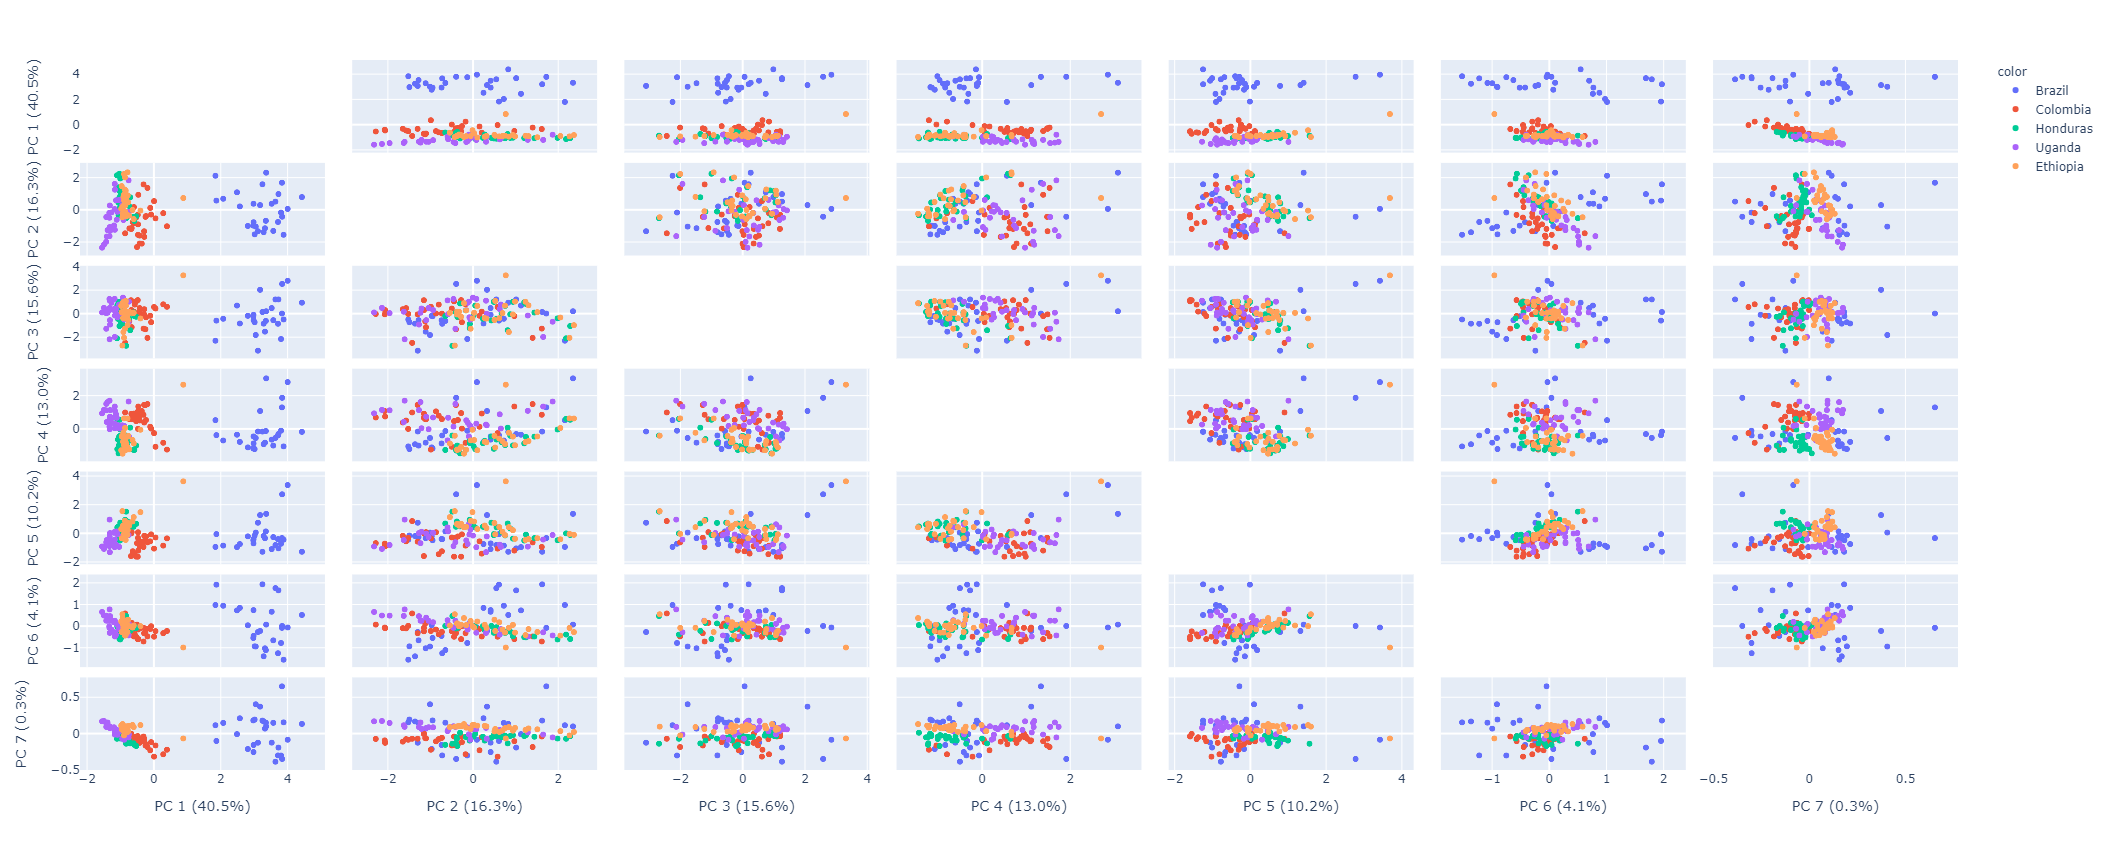

In [120]:
# PCA Scatter Matrix
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(7),
    color=df["Country"],
    height=850,
    width=1300
)

fig.update_traces(diagonal_visible=False)
fig.show()

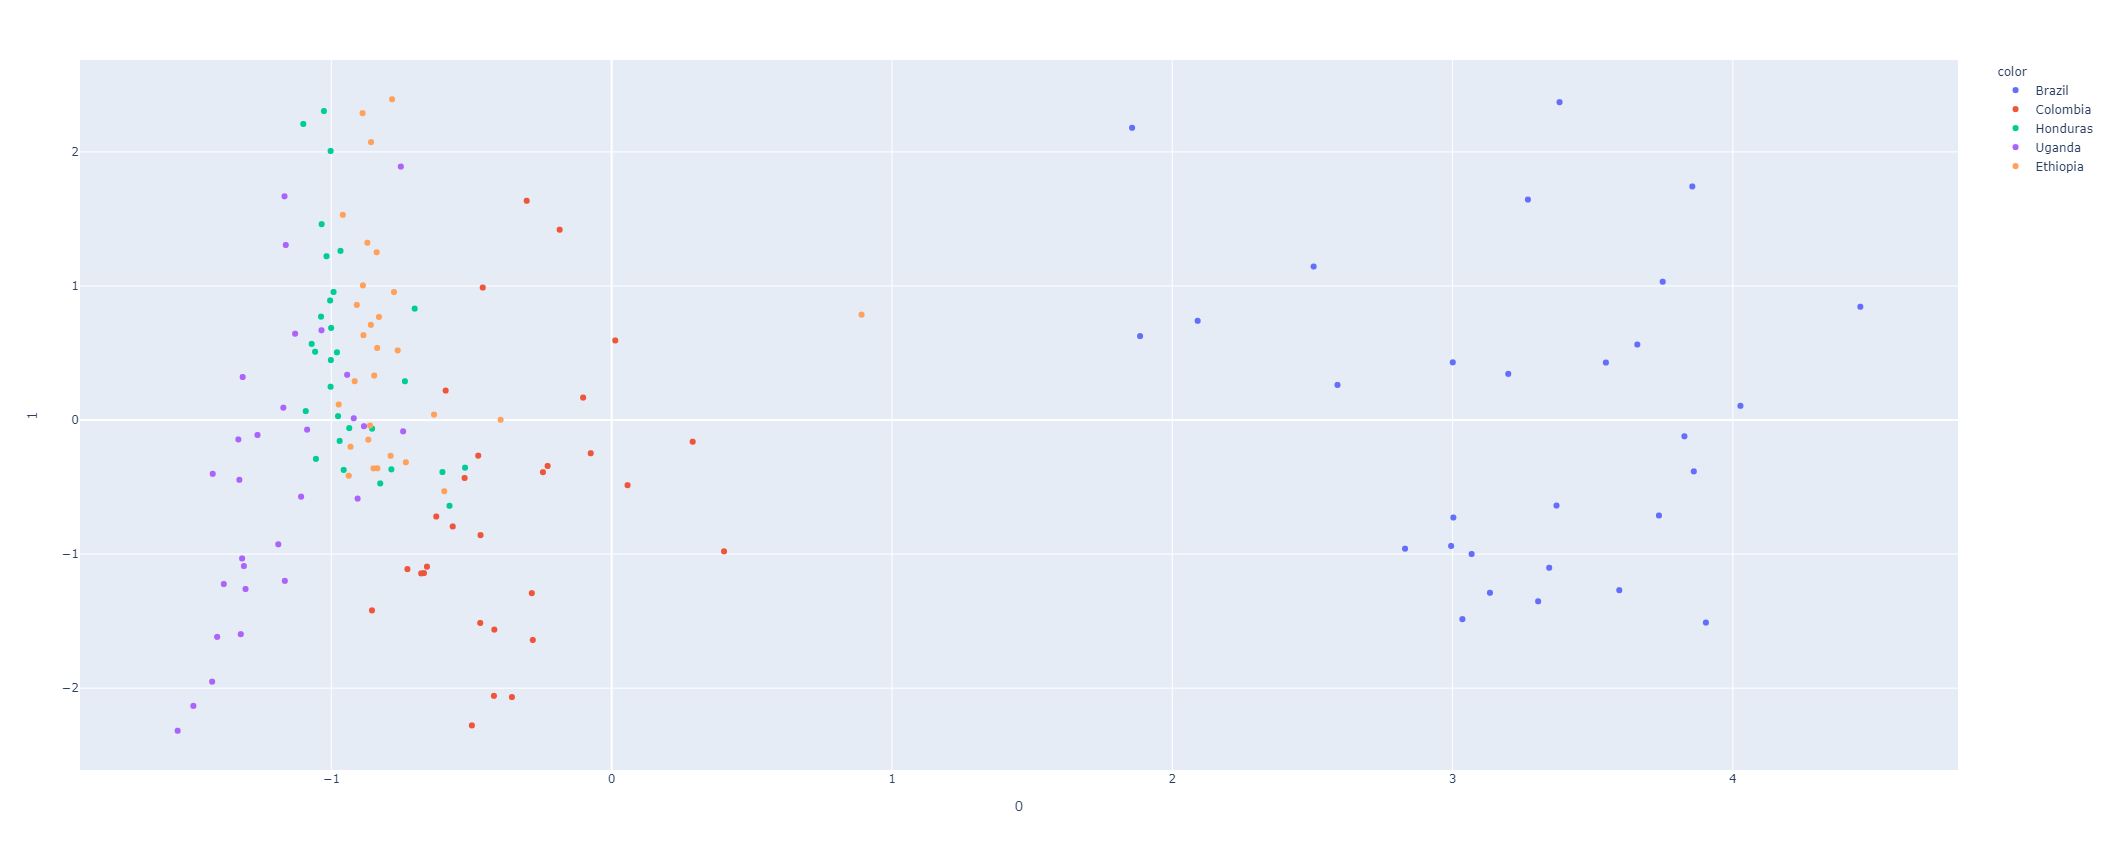

In [121]:
# Two-Dimensional Component Analysis
pca = PCA(n_components=2)
components = pca.fit_transform(x)

fig = px.scatter(components, x=0, y=1, 
                 color=df['Country'], height=850,
                 width=1300)
fig.show()

In [122]:
# Three-Dimensional Component Analysis
pca = PCA(n_components=3)
components = pca.fit_transform(x)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Country'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    height=850,
    width=1300
)
fig.show()

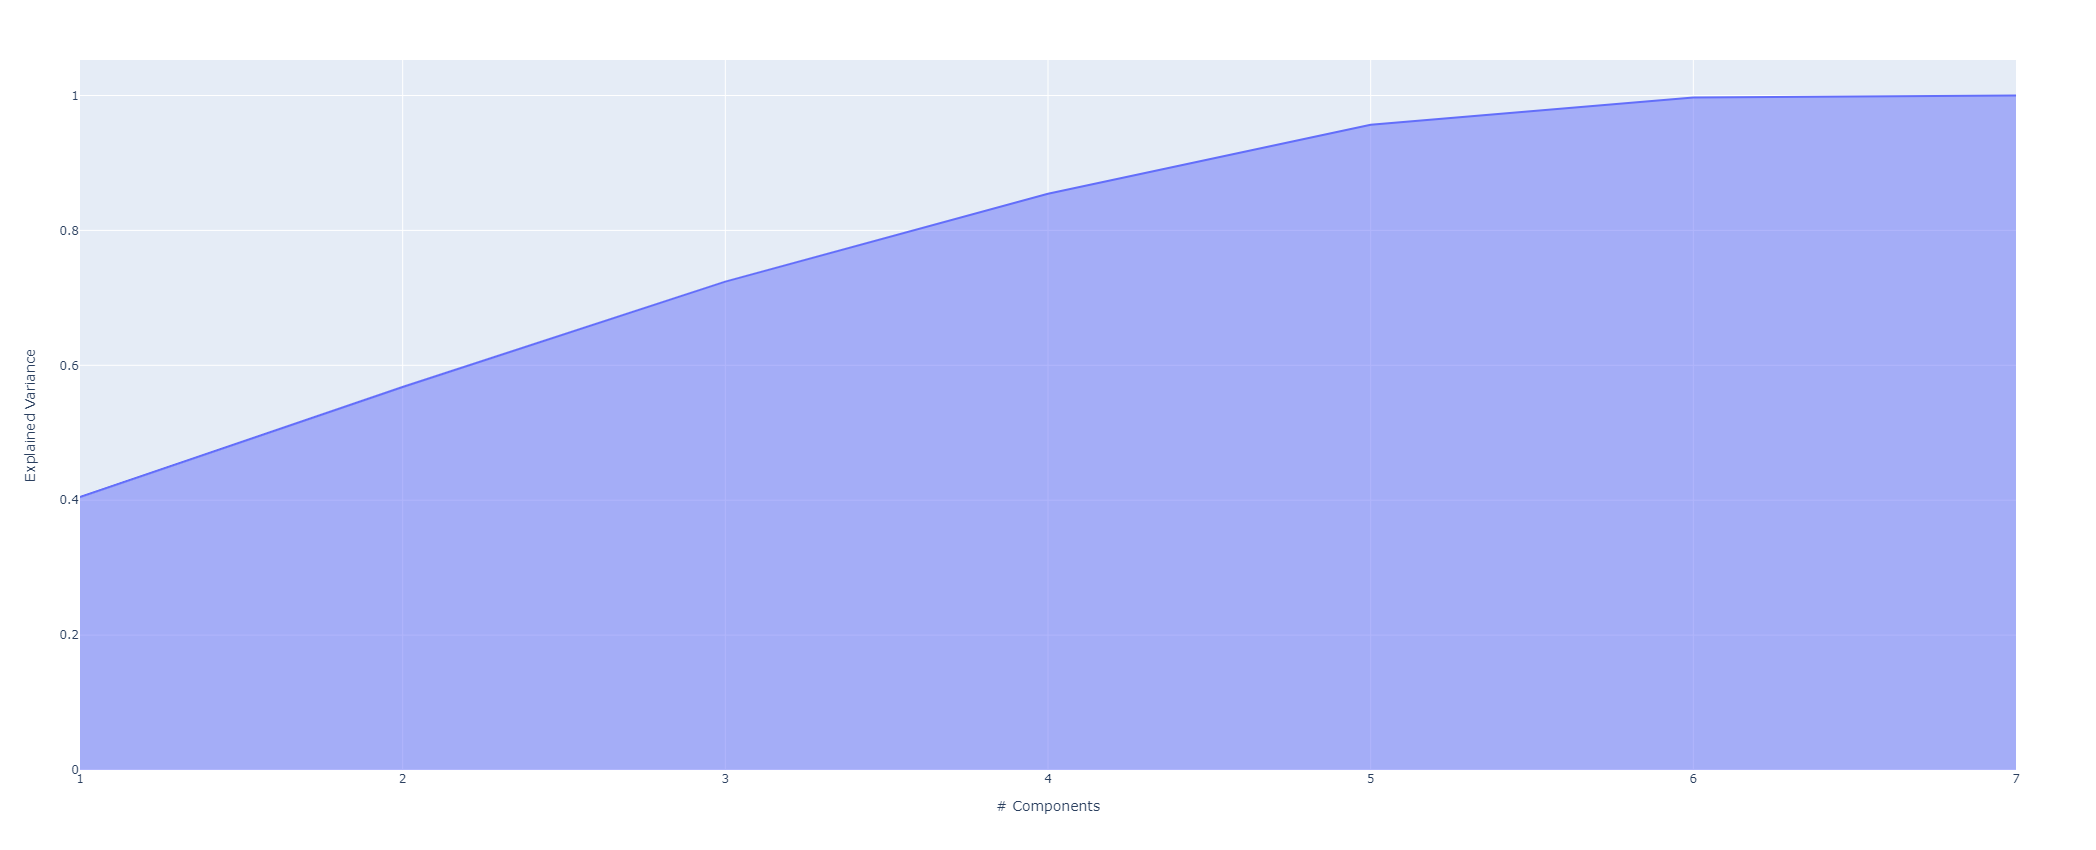

In [123]:
# Cummulative Variance
pca = PCA()
pca.fit(principalComponents)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    height=850,
    width=1300
)